# Quantum Arithemetic - Adder

_Based on paper: Quantum networks for elementary arithmetic operations (1996) by Vlatko Vedral,* Adriano Barenco, and Artur Ekert_

In [7]:
from qiskit_aer import AerSimulator

from vbe_arithmetic import ripple_add, create_circuit

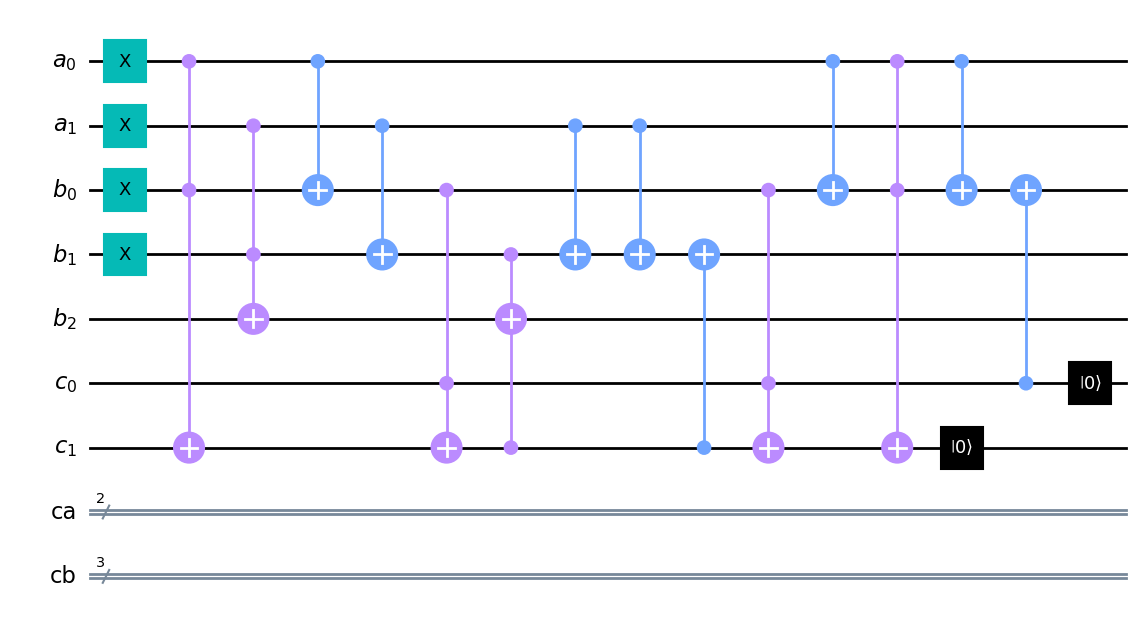

In [8]:
# Input bits
a_dec = 3 #[1, 0, 1, 0]
b_dec = 3 #[1, 0, 1, 0]

# Number of bits in the binary numbers
N = max(a_dec.bit_length(), b_dec.bit_length())

qc, a, b, c, ca, cb = create_circuit(a_dec, b_dec, N)

# add a to b
# i.e. 'b + a'
ripple_add(qc, a, b, c, N)

qc.draw(output="mpl", filename="circuits/1996_adder.png", style="clifford")

In [9]:
qc.measure(a, ca)
qc.measure(b, cb)

backend_sim = AerSimulator()
job_sim = backend_sim.run(qc, shots=1)
result_sim = job_sim.result()

print(result_sim.get_counts(qc))

{'110 11': 1}
